# POC - AI Pool 2022 - Day 01 - Data Science

## Introduction

#### Data Science & Data scientist

Before going futher in this subject, let's start by a short definition of what Data Science is : Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from structured and unstructured data and apply knowledge and actionable insights from data across a broad range of application domains.

A Data Scientist is often seen as a handyman from fetching the data to putting a machine learning model in production.
In reality, each part related to AI and Data as its own job : The Data Miner fetches the data, the machine learning engineer builds machine learning models and the MLOps deploys those models.

Another way to see the Data scientist (which I prefere) is as the one who knows how to handle all works related to data : Data mining, Data exploration, interpretation of the data, its visualization and its processing.

We will not go any further into details of each job in AI but if you want to know more I advise you to read [this great book](https://huyenchip.com/ml-interviews-book/contents/chapter-1.-ml-jobs.html) written by _Chip Huyen_ who explains each job in every part of AI.

#### What you will see in this subject

In this subject you will discover a few bases of Data Science : How to manipulate data, explore it, vizualise it and interpret it.\
Eventually, you will learn how to use a machine learning model using the `sklearn` library.

If you have any questions, don't hesitate to ask other candidates or one of the supervisors.\
Good luck and have fun.

In [2553]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## I - Data Exploration

Before manipulating our data or even interpreting it we need to explore it, to know what type of data do we have and what does it mean.\
So let's start by exploring our data using the `pandas` and `searborn` libraries.

### I-I Reading a csv

We have at our disposition a csv (`./data/train.csv`) that we want to explore, the first step is to know what data does our csv contains?

**Tasks:**
* Using pandas, open `./data/train.csv`
* Find what columns our csv contains (name, type and number of values)
* Find what is our dataframe's shape

In [2554]:
filename = "./data/train.csv"

In [2555]:
df = pd.read_csv(filename)

In [2556]:
print(df.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000       

### I-II Set indexes

Nice! We now have a better understanding of our data. It seems like we are facing the `titanic` dataset, referencing each passager who were on board of the titanic.\
Our goal is to explore this dataset and finally to create a simple machine learning model to predict if a passenger survived using its informations.

To give you a better understanding of our data, here is a description of each columns :
* **PassengerId** : ID of the passenger.
* **Survived** : `0` if the passenger did not survive, `1` if it did.
* **Pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* **Name** : Name of the passenger.
* **Sex** : Sex of the passenger.
* **Age** : Age of the passenger.
* **SibSp** : Number of siblings / spouses aboard.
* **Parch** : Number of parents / children aboard.
* **Ticket** : Ticket number.
* **Fare** : Ticket price.
* **Cabin** : Cabin number.
* **Embarked** : Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Using the above informations, we can see that the `PassengerId` colomn is just full of indexes referencing each passagenrs.\
Before going futher let's precise that we will use the `PassengerId` column as index.

**Tasks:**
* Set the DataFrame index using `PassengerId` column.

In [2557]:
data = pd.DataFrame(df, columns=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
data.set_index('PassengerId', inplace=True)
display(data)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Good! Now we can start.

### I-III Cleaning dataset

One of the main issues in Data Science are missing values. Watch the informations taht you have it your columns and ask yourself which column could be a problem and we should drop.
If you said `Cabin` you are right! (IF you said `Age`, remember what does our final goal is in this subject).

(In reality we have techniques to deal with missing values but to simplify this subject we will not see them.)

Indeed, the `Cabin` column miss soo many values that it useless, we prefer to drop it.\
We can also see that it miss values in the columns `Age` and `Embarked`, to simplify the next steps we also decide to drop every row containing missing value(s).

**Tasks:**
* Drop the `Cabin` column ainsi que toute ligne contenant une valeur non atribuée
* Drop every rows with one or more missing values

In [2558]:
df = data.drop(columns=["Cabin"])
display(df)

#Before
print(df.isna().sum())
clean_df = df.dropna()

#After
print(clean_df.isna().sum())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


### I-IV Basic data exploration

Now we are sure we no longer have missing values we can go futher.

As we can see, our csv contains numérics and alphanumerics values. Both are explorable but to start we will focus only on the numerics values.\
A good start would be to know the distribution of each values.

**Tasks:**
* Find the mean value for each numerical column
* Find the std value for each numerical column
* Find the min value for each numerical column
* Find the lower percentile (25) for each numerical column
* Find the median for each numerical column
* Find the upper percentile (75) for each numerical column
* Find the max value for each numerical column

In [2559]:
print("Mean:")
specified_column_mean = clean_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mean()
print(specified_column_mean)

print("\nStd:")
specified_column_std = clean_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].std()
print(specified_column_std)

print("\nMin:")
specified_column_min = clean_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].min()
print(specified_column_min)

print("\nLower percentile:")
specified_column_lower_percentile = clean_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].quantile(0.25)
print(specified_column_lower_percentile)

print("\nMedian:")
specified_column_median = clean_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].median()
print(specified_column_median)

print("\nUpper percentile:")
specified_column_upper_percentile = clean_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].quantile(0.75)
print(specified_column_upper_percentile)

print("\nMax:")
specified_column_max = clean_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].max()
print(specified_column_max)

Mean:
Survived     0.404494
Pclass       2.240169
Age         29.642093
SibSp        0.514045
Parch        0.432584
Fare        34.567251
dtype: float64

Std:
Survived     0.491139
Pclass       0.836854
Age         14.492933
SibSp        0.930692
Parch        0.854181
Fare        52.938648
dtype: float64

Min:
Survived    0.00
Pclass      1.00
Age         0.42
SibSp       0.00
Parch       0.00
Fare        0.00
dtype: float64

Lower percentile:
Survived     0.00
Pclass       1.00
Age         20.00
SibSp        0.00
Parch        0.00
Fare         8.05
Name: 0.25, dtype: float64

Median:
Survived     0.00000
Pclass       2.00000
Age         28.00000
SibSp        0.00000
Parch        0.00000
Fare        15.64585
dtype: float64

Upper percentile:
Survived     1.0
Pclass       3.0
Age         38.0
SibSp        1.0
Parch        1.0
Fare        33.0
Name: 0.75, dtype: float64

Max:
Survived      1.0000
Pclass        3.0000
Age          80.0000
SibSp         5.0000
Parch         6.0000
Fare    

We are starting to see a little more clearly, what can we interpret from these data?

We can see that an average passenger aboard the Titanic has 30 yrs old, came without a wife/husband or child/parent and bought his ticket 35\$$$.\
On the other hand, we do not learn much more about the `Pclass` column. This is because this contains numbers that do not represent values but categories.\
(As a reminder: 1 = 1st class, 2 = 2nd class, 3 = 3rd class.)

Let's continue to learn about the passengers aboard the Titanic by looking at the number of passengers in each class.

**Tasks:**
* Find how many passengers was in each class

In [2560]:
countClass1 = clean_df['Pclass'].value_counts()[1]
countClass2 = clean_df['Pclass'].value_counts()[2]
countClass3 = clean_df['Pclass'].value_counts()[3]
print(countClass1, countClass2, countClass3)

184 173 355


We can see that the third class represents almost half of the passengers, it changes our vision of the Titanic ... \
Let's explore a bit the profile of a passenger in each of the classes do you want?

**Tasks:**
* Find the mean value of the `Parch` column for each class.
* Find the mean value of the `SibSp` column for each class.
* Affichez l'age moyen d'un passager dans chacunes des classes
* Affichez le prix moyen d'un ticket pour chacunes des classes
* Affichez le taux de survie des passagers dans chacunes des classes

In [2561]:
mean_parch_class1 = clean_df.loc[clean_df['Pclass'] == 1, 'Parch'].mean()
mean_parch_class2 = clean_df.loc[clean_df['Pclass'] == 2, 'Parch'].mean()
mean_parch_class3 = clean_df.loc[clean_df['Pclass'] == 3, 'Parch'].mean()
print(mean_parch_class1, mean_parch_class2, mean_parch_class3)

mean_sibsp_class1 = clean_df.loc[clean_df['Pclass'] == 1, 'SibSp'].mean()
mean_sibsp_class2 = clean_df.loc[clean_df['Pclass'] == 2, 'SibSp'].mean()
mean_sibsp_class3 = clean_df.loc[clean_df['Pclass'] == 3, 'SibSp'].mean()
print(mean_sibsp_class1, mean_sibsp_class2, mean_sibsp_class3)

mean_age_class1 = clean_df.loc[clean_df['Pclass'] == 1, 'Age'].mean()
mean_age_class2 = clean_df.loc[clean_df['Pclass'] == 2, 'Age'].mean()
mean_age_class3 = clean_df.loc[clean_df['Pclass'] == 3, 'Age'].mean()
print(mean_age_class1, mean_age_class2, mean_age_class3)

mean_fare_class1 = clean_df.loc[clean_df['Pclass'] == 1, 'Fare'].mean()
mean_fare_class2 = clean_df.loc[clean_df['Pclass'] == 2, 'Fare'].mean()
mean_fare_class3 = clean_df.loc[clean_df['Pclass'] == 3, 'Fare'].mean()
print(mean_fare_class1, mean_fare_class2, mean_fare_class3)

mean_survive_class1 = clean_df.loc[clean_df['Pclass'] == 1, 'Survived'].mean()
mean_survive_class2 = clean_df.loc[clean_df['Pclass'] == 2, 'Survived'].mean()
mean_survive_class3 = clean_df.loc[clean_df['Pclass'] == 3, 'Survived'].mean()
print(mean_survive_class1, mean_survive_class2, mean_survive_class3)

0.41304347826086957 0.4046242774566474 0.4563380281690141
0.45652173913043476 0.4277456647398844 0.5859154929577465
38.10554347826087 29.87763005780347 25.14061971830986
88.04812119565219 21.471556069364162 13.229435211267605
0.6521739130434783 0.4797687861271676 0.23943661971830985


We can see very interesting information like:
* The average price of a ticket for each of the classes is respectively 88$\$$, 21$\$$, and 13$\$$.
* The "old" population is more predominantly in first class where the youngest population is more in third class
* The majority of the third class died following the sinking of the Titanic.

Now let's move on to different embarkation ports, which one do you think was used the most?

To help you, here is the titanic's journey:\
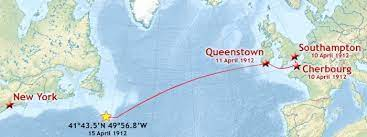

**Task:**
* Find how many passengers embarked by each ports (As a reminder : C = Cherbourg, Q = Queenstown, S = Southampton)

In [2562]:
passengers_cherbourg = clean_df['Embarked'].value_counts()['C']
passengers_queenstown = clean_df['Embarked'].value_counts()['Q']
passengers_southampton = clean_df['Embarked'].value_counts()['S']
print(passengers_cherbourg, passengers_queenstown, passengers_southampton)

130 28 554


As expected, we can see that it is in Southampton (its city of departure) that the Titanic embarked the most passengers, followed by Cherbourd its first stopover and Queenstown its second stopover.\
Now let's look at how many passengers of each class have joined at each port.

**Objectif:**
* For each class, find how many people embarked on board from which port.

In [2563]:
num_passengers_cherbourg_class1 = clean_df.loc[clean_df['Pclass'] == 1, 'Embarked'].value_counts()['C']
num_passengers_cherbourg_class2 = clean_df.loc[clean_df['Pclass'] == 2, 'Embarked'].value_counts()['C']
num_passengers_cherbourg_class3 = clean_df.loc[clean_df['Pclass'] == 3, 'Embarked'].value_counts()['C']
print(num_passengers_cherbourg_class1, num_passengers_cherbourg_class2, num_passengers_cherbourg_class3)

num_passengers_queenstown_class1 = clean_df.loc[clean_df['Pclass'] == 1, 'Embarked'].value_counts()['Q']
num_passengers_queenstown_class2 = clean_df.loc[clean_df['Pclass'] == 2, 'Embarked'].value_counts()['Q']
num_passengers_queenstown_class3 = clean_df.loc[clean_df['Pclass'] == 3, 'Embarked'].value_counts()['Q']
print(num_passengers_queenstown_class1, num_passengers_queenstown_class2, num_passengers_queenstown_class3)

num_passengers_southampton_class1 = clean_df.loc[clean_df['Pclass'] == 1, 'Embarked'].value_counts()['S']
num_passengers_southampton_class2 = clean_df.loc[clean_df['Pclass'] == 2, 'Embarked'].value_counts()['S']
num_passengers_southampton_class3 = clean_df.loc[clean_df['Pclass'] == 3, 'Embarked'].value_counts()['S']
print(num_passengers_southampton_class1, num_passengers_southampton_class2, num_passengers_southampton_class3)

74 15 41
2 2 24
108 156 290


We can see that for classes 2 and three the almost majority of passengers embarked at Southampton while for first class a significant proportion of passengers embarked at Cherbourg.

### I-V Advance Data Exploration

We're starting to see it much clearer in our data, aren't we? \
Now is the time to explore the correlations between our different values and in particular the survival rate.

So start by displaying a simple correlation table between the numerical values.

**Task:**
* Find and display the correlation between each numerical columns

In [2564]:
co_mtx = clean_df.corr(numeric_only=True)

print(co_mtx)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.356462 -0.082446 -0.015523  0.095265  0.266100
Pclass   -0.356462  1.000000 -0.365902  0.065187  0.023666 -0.552893
Age      -0.082446 -0.365902  1.000000 -0.307351 -0.187896  0.093143
SibSp    -0.015523  0.065187 -0.307351  1.000000  0.383338  0.139860
Parch     0.095265  0.023666 -0.187896  0.383338  1.000000  0.206624
Fare      0.266100 -0.552893  0.093143  0.139860  0.206624  1.000000


We can already interpret a lot of information but before taking a look I suggest that we add some colors.

**Task:**
* Display a heatmap showing the correlation between each numerical columns

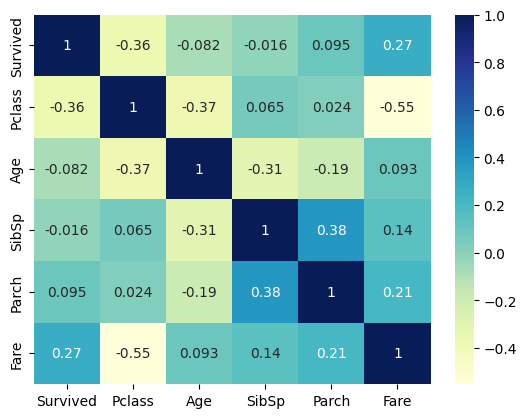

In [2565]:
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

Isn't it nicer to read? Based on whether a passenger survived or not, what can be interpreted by this graph?

We can see that the passenger class was a factor with a big influence on the survival rate of the passenger, those in first class apparently had more "luck"... \
We can see a semblance of correlation between age and the fact that a passenger survived, let's try to find out more.

**Taks:**
* Using a histogram display the relationship between age and whether or not a passenger survived

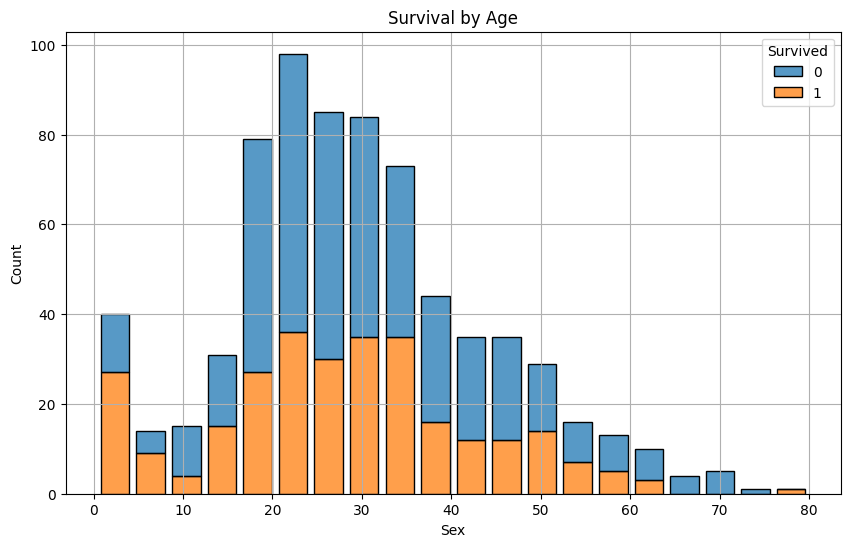

In [2566]:
plt.figure(figsize=(10, 6))
sns.histplot(data=clean_df, x='Age', hue='Survived', multiple='stack', shrink=.8)
plt.title("Survival by Age")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.grid(True)
plt.show()

Well, we are sure there is a correlation between age and the fact of having survived the Titanic. Women and children first, they say, don't they. \
Moreover, we have to verify the exatitude of this term for children but not yet for women. You know what you have left to do...

**Task:**
* Show if there is a link between a passenger's Sex and whether or not it survived

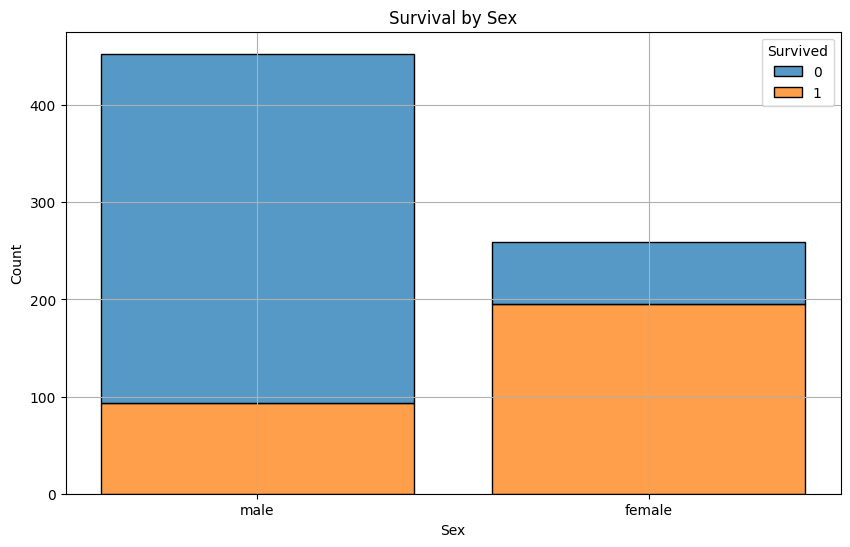

In [2567]:
plt.figure(figsize=(10, 6))
sns.histplot(data=clean_df, x='Sex', hue='Survived', multiple='stack', shrink=.8)
plt.title("Survival by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.grid(True)
plt.show()

This sentence is therefore true!

Now that we have explored different correlations, we will be able to prepare our data so that our model can interpret it;

Our model only accepts numeric values so how to do for the `Sex` column?\
Just convert it to a numeric value.

We will also try to highlight the correlation between age and the survival rate (we saw that a passenger of five years or less is considered as a child).


**Tasks:**
* Create a new column named `Child` and fill it (remember, we consider as a child a passenger that is less than 6 yrs old)
* Convert the `Sex` column into a numerical column

In [2568]:
clean_df['Sex'] = clean_df['Sex'].map({'female': 1, 'male': 0})

In [2569]:
clean_df['Child'] = clean_df['Age'] < 6

Well, our data is ready, before creating the model let's take a final look at the correlations between our data to help us decide which ones might be useful to us.

**Obectifs:**
* Using a heatmap, show the correlation between all the numerical columns
* Using the `groupby` method of pandas, show the relation between `Sex` and `Survived`
* Using the `groupby` method of pandas, show the relation between `Child` and `Survived`

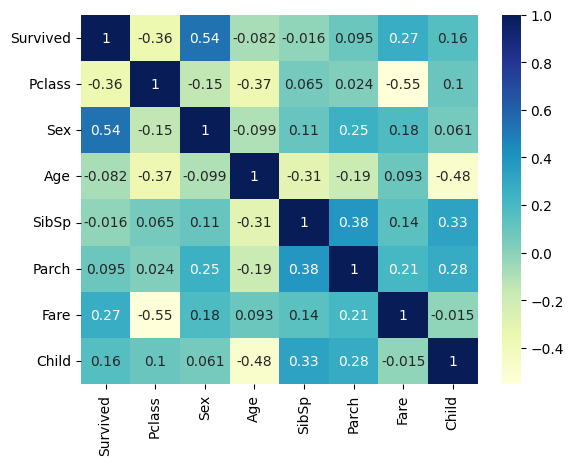

In [2570]:
co_mtx = clean_df.corr(numeric_only=True)
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

In [2571]:
relation = clean_df.groupby('Sex')['Survived'].describe()
print(relation)

     count      mean       std  min  25%  50%  75%  max
Sex                                                    
0    453.0  0.205298  0.404366  0.0  0.0  0.0  0.0  1.0
1    259.0  0.752896  0.432163  0.0  1.0  1.0  1.0  1.0


In [2572]:
relation = clean_df.groupby('Child')['Survived'].describe()
print(relation)

       count      mean       std  min  25%  50%  75%  max
Child                                                    
False  668.0  0.384731  0.486896  0.0  0.0  0.0  1.0  1.0
True    44.0  0.704545  0.461522  0.0  0.0  1.0  1.0  1.0


## II - Machine learning

So far we have taken the time to :
* Explore the data
* View the data
* Correlate the data
* Interpret the data
It's a good start, don't you think?

Now let's get down to business (_add a drumbeat_): machine learning ("_tin tin tin _").\
For now we're not going to go into too much detail on how to create our models ourselves, we'll just use the `sklearn` library which will do most of the work for us.

In [2573]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

### II-I Data

Before creating our model (promised this is the last step of preparation) we must create a testing and training set ("_Set what?_" Said a student in the distance).\
To understand what a test set is and why it is necessary it is best to go over what machine learning is so let's start with a short definition.

<ins>Machine learning</ins>: Machine learning is the study of computer algorithms that can improve automatically through experience and by the use of data. It is seen as a part of artificial intelligence.

There are two things to remember from this definition:
- "_computer algorithms that can improve automatically_": In machine learning, we do not directly create the solution but an algorithm that will adjust "automatically" until potentially reaching the desired result.
- "_can improve automatically through experience and by the use of data._": Our model learns thanks to data, so the model is not at the center of our attention, it is first and foremost our data that is.

A machine learning model will adjust to meet a single criterion: Bringing the _cost_ closer to zero.\
As a reminder, the loss function (producing the loss) is a function which from a prediction and labels indicates how wrong the model is, the closer the loss is to zero, the better.

To illustrate these remarks, I suggest that we take a look at the cost function nammed MSE (mean squared error).\
<img src="https://www.gstatic.com/education/formulas2/355397047/en/mean_squared_error.svg"/>

We have here named $Y_i$ the model prediction for a numbered data item $i$ and $\hat{Y}_i$ the result expected by our model for this same numbered data $i$.\
We sum the results obtained for each data numbered from $0$ to $n$ and take the average of this sum by dividing the result by $n$.

We thus obtained the average difference between the predictions of the model and the expected results, it is our cost.

The loss is practical to verify the learning of a model, it suffices to verify that the cost decreases as the model learn. On the other hand, if I show you a cost of $100$, it's hard to know if it's good or not, that's where the accuracy comes in, it's the percentage of times the model has found the right result.\
An accuracy of $50%$ would mean that our model is wrong every other time, $90%$ once in 10, etc ...

On the other hand, we cannot always have an accurary, take for example a model which aims to predict the exact speed of a car.\
He predicted $121.5km/h$ and the car was going at $119km/h$, you can't tell your model is "right" or "wrong". You will say rather that it was wrong of $2.5km/h$ (which is a loss).


"_And our history of testing and training set, is where in there? _" Exclaims the impatient.\
If we summarize, our model learns on the data we give it and tries to reduce the cost calculated according to the prediction of our model and the expected results but if we want to know how our model behaves on the data that it does not have ever seen how we do it? We create a test set, a set of data our model had never see and test it on it ...

Our training set is the data that is used by our model to train, our test set is a data that our model has never seen that we use to know how behaves on a data that he has not seen before.
To be precise there is even a third set called the validation set but we will not discuss it for the moment.

Here as we do not have only one csv, we will have to divide it into two sets (training and testing). \
You understood everything? Perfect! Enough of an explanation like that, let's take action!

**Tasks:**
* Create a dataframe named `train_df` containing 80% of our data
* Create a dataframe named `test_df` containing 20% of our data

In [2574]:
test_df = clean_df.sample(frac=0.2)
train_df = clean_df.drop(test_df.index)

Now that we have our sets, it's time to choose what data we're going to use to train our model.\
To start, we recommend using the `Pclass`,` Sex`, `Age`,` Fare` and `Child` columns but you are free to modify this selection.

**Task:**
* Select the columns you think are useful to predict if a passenger survived

In [2575]:
columns = ['Pclass', 'Sex', 'Age', 'Fare']

We will **FINALLY** be able to switch to buzz word, the machine learning application.

To start our first prediction we will use an extremely simple model that some of you may have already seen or used: linear regression.\
The principle of a linear regression is to draw a line in $N$ dimensions where $N$ represents the number of values that we give to our model.

To illustrate these words, here is the course of learning a linear regression on a two-dimensional data which is linear: \
![LiRegURL](https://miro.medium.com/max/700/1*CjTBNFUEI_IokEOXJ00zKw.gif "Linear regression")

This algorithm is quick and easy to set up but only works if the data is linear (which answers the equation $y = b_0 + b_1x$).\
Is ours? Let's try and we'll see.

**Task:**
* Train a linear regression model on your training set and test it on your test set

In [2576]:
model = LinearRegression()
model.fit(X=train_df[columns], y=train_df['Survived'])
print(model.score(X=test_df[columns], y=test_df['Survived']))

0.3689607267882684


If you have inconclusive results (less than $0.65$) don't be surprised.\
Obviously our data is not linear (not surprisingly), you can check by executing the code below:

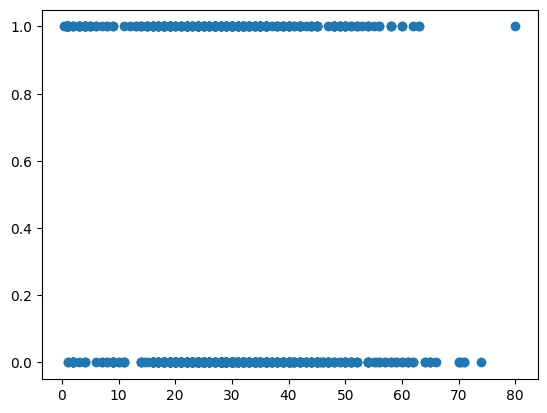

In [2577]:
plt.scatter(clean_df.Age, clean_df.Survived)

An algorithm that might be more promising is logisitic regression, it tries to apply the following formula:
## $\frac{1}{(1 + e^{-(b_0 + b_1x)}}$

Let's see what it looks like!

**Task:**
* Train a logistic regression model on your training set and test it on your test set and display your score

In [2578]:
clf = LogisticRegression()
clf.fit(X=train_df[columns], y=train_df['Survived'])
print(clf.score(X=test_df[columns], y=test_df['Survived']))

0.8169014084507042


You should have much better results (over $0.75$).

To conclude, let's try another kind of algorithm, a decision tree named Random forest.\
We will not detail its operation here but we urge you more than strongly to inquire about it.

**Task:**
* Train a Random Forest decision tree on your training set and test it on your test set

In [2579]:
rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X=train_df[columns], y=train_df['Survived'])
print(rf_classifier.score(X=test_df[columns], y=test_df['Survived']))

0.7746478873239436


Congratulations! You have quickly discovered the basics of data science and used your first machine learning models, I am impressed.

## III - It's your turn!

To conclude this subject, we have a challenge for you. Go to [this website](https://www.kaggle.com/c/titanic) and try to solve the challenge.\
The one with the best results will earn **100 points** on the day!